In [1]:
#K-means Algorithm 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#To load dataset
df=pd.read_csv("income.csv")

In [4]:
df.head()

,Name,Age,Income
0,Anu,27,70000
1,seema,29,90000
2,suresh,29,61000
3,kamal,28,60000
4,poonam,42,150000


In [5]:
df.shape

(22, 3)

In [6]:
#To check null values
df.isnull().sum()

Name      0
Age       0
Income    0
dtype: int64

In [7]:
#to show all details of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
Name      22 non-null object
Age       22 non-null int64
Income    22 non-null int64
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [8]:
#to delete Name column permanently from df
df.drop("Name",axis=1,inplace=True)

In [9]:
df.head()

,Age,Income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


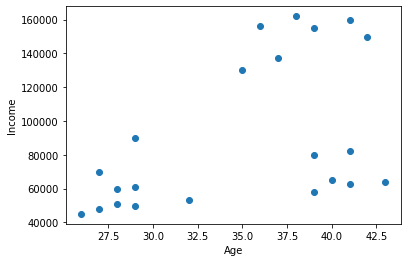

In [10]:
#visualise Age with Income with the help of scatter plot
plt.scatter(df["Age"],df["Income"])
plt.xlabel("Age")
plt.ylabel('Income')
plt.show()

In [11]:
from sklearn.cluster import KMeans

In [12]:
#create the object of LMeans class
km=KMeans(n_clusters=3) #n_clusters inbuilt parameter , to give no. of cluster

In [13]:
#fit_predict()  inbuilt method of KMeans class It is used to train and 
#test the model , train and test both apply together
km.fit_predict(df[["Age","Income"]]) #[["column1","col2"]] means 2D


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [14]:
predicted=km.fit_predict(df[["Age","Income"]])

In [15]:
print(predicted)

[2 2 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 1]


In [16]:
#We create a new column Cluster and add these column in existing df
#and store value of these column of value of predicted variable  
df['Cluster']=predicted


In [17]:
df

,Age,Income,Cluster
0,27,70000,2
1,29,90000,2
2,29,61000,1
3,28,60000,1
4,42,150000,0
5,39,155000,0
6,41,160000,0
7,38,162000,0
8,36,156000,0
9,35,130000,0


In [18]:
km.cluster_centers_  #to show centroid 0f each cluster
#cluster_centers_ inbuilt method of kmeans class

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

In [19]:
#Visualisation with the help of scatter plot after training
#Create 3 dataframe according to cluster
df1=df[df["Cluster"]==0]
df2=df[df["Cluster"]==1]
df3=df[df["Cluster"]==2]

In [20]:
df1

,Age,Income,Cluster
4,42,150000,0
5,39,155000,0
6,41,160000,0
7,38,162000,0
8,36,156000,0
9,35,130000,0
10,37,137000,0


In [21]:
df2

,Age,Income,Cluster
2,29,61000,1
3,28,60000,1
11,26,45000,1
12,27,48000,1
13,28,51000,1
14,29,49500,1
15,32,53000,1
16,40,65000,1
17,41,63000,1
18,43,64000,1


In [22]:
df3

,Age,Income,Cluster
0,27,70000,2
1,29,90000,2
19,39,80000,2
20,41,82000,2


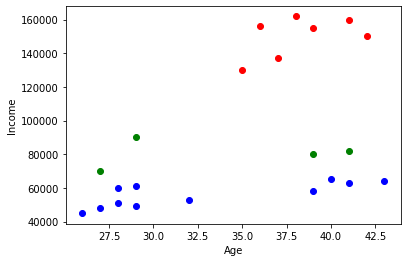

In [23]:
plt.scatter(df1["Age"],df1["Income"],color="red")
plt.scatter(df2["Age"],df2["Income"],color="blue")
plt.scatter(df3["Age"],df3["Income"],color="green")
plt.xlabel("Age")
plt.ylabel('Income')
plt.show()

In [24]:
df.drop("Cluster",axis=1,inplace=True)

In [25]:
df.head()

,Age,Income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [26]:
#scaling issue of dataset because data in cluster is not a proper define because
#scaling is not a proper of features(inputs)

In [27]:
#apply StandardScaler in dataframe df
from sklearn.preprocessing import StandardScaler

In [28]:
#create object of StandardScaler class
ss=StandardScaler()
#ss user defined object of StandardScaler class

In [29]:
df.columns

Index(['Age', 'Income'], dtype='object')

In [30]:
for col in df:
    #create object ss of StandardScaler class
    ss=StandardScaler()
    df[col]=ss.fit_transform(df[[col]]) #expect 2D array [[]]

In [31]:
df.head()

,Age,Income
0,-1.356055,-0.480684
1,-1.009157,-0.010159
2,-1.009157,-0.692421
3,-1.182606,-0.715947
4,1.245679,1.401417


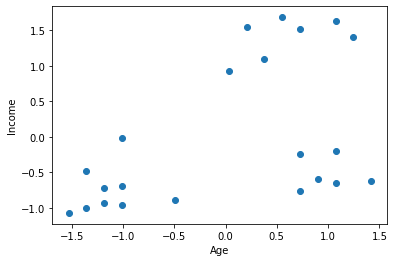

In [32]:
#visualise Age with Income with the help of scatter plot
plt.scatter(df["Age"],df["Income"])
plt.xlabel("Age")
plt.ylabel('Income')
plt.show()

In [33]:
#create the object of LMeans class
km=KMeans(n_clusters=3) #n_clusters inbuilt parameter , to give no. of cluster

In [34]:
#train and test the model
predicted=km.fit_predict(df[["Age","Income"]])

In [35]:
print(predicted)

[1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 2]


In [36]:
#We create a new column Cluster and add these column in existing df
#and store value of these column of value of predicted variable  
df['Cluster']=predicted

In [37]:
df

,Age,Income,Cluster
0,-1.356055,-0.480684,1
1,-1.009157,-0.010159,1
2,-1.009157,-0.692421,1
3,-1.182606,-0.715947,1
4,1.245679,1.401417,0
5,0.725332,1.519048,0
6,1.072230,1.636679,0
7,0.551883,1.683732,0
8,0.204985,1.542574,0
9,0.031536,0.930891,0


In [38]:
km.cluster_centers_  #to show centroid 0f each cluster
#cluster_centers_ inbuilt method of kmeans class

array([[ 0.60143983,  1.40141653],
       [-1.1247901 , -0.74862223],
       [ 0.98550535, -0.51205261]])

In [39]:
#Create 3 dataframe according to cluster
df1=df[df["Cluster"]==0]
df2=df[df["Cluster"]==1]
df3=df[df["Cluster"]==2]

In [40]:
df1

,Age,Income,Cluster
4,1.245679,1.401417,0
5,0.725332,1.519048,0
6,1.072230,1.636679,0
7,0.551883,1.683732,0
8,0.204985,1.542574,0
9,0.031536,0.930891,0
10,0.378434,1.095575,0


In [41]:
df2

,Age,Income,Cluster
0,-1.356055,-0.480684,1
1,-1.009157,-0.010159,1
2,-1.009157,-0.692421,1
3,-1.182606,-0.715947,1
11,-1.529504,-1.068841,1
12,-1.356055,-0.998262,1
13,-1.182606,-0.927683,1
14,-1.009157,-0.962973,1
15,-0.488811,-0.880631,1


In [42]:
df3

,Age,Income,Cluster
16,0.898781,-0.598316,2
17,1.072230,-0.645368,2
18,1.419128,-0.621842,2
19,0.725332,-0.245422,2
20,1.072230,-0.198369,2
21,0.725332,-0.762999,2


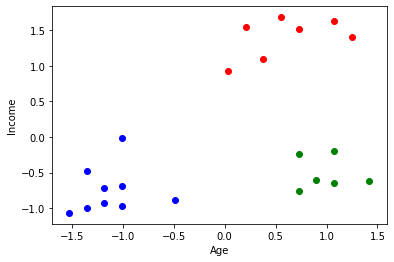

In [43]:
#Visualisation with the help of scatter plot after training_testing
plt.scatter(df1["Age"],df1["Income"],color="red")
plt.scatter(df2["Age"],df2["Income"],color="blue")
plt.scatter(df3["Age"],df3["Income"],color="green")
plt.xlabel("Age")
plt.ylabel('Income')
plt.show()

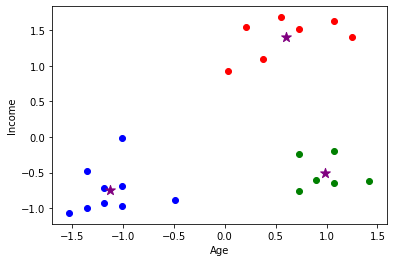

In [49]:
#Visualise center point in this plot
plt.scatter(df1["Age"],df1["Income"],color="red")
plt.scatter(df2["Age"],df2["Income"],color="blue")
plt.scatter(df3["Age"],df3["Income"],color="green")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',s=105,color="purple")
#s means size means change the size of datapoint in pixel
#pixel means smallest unit of graphics 
plt.xlabel("Age")
plt.ylabel('Income')
plt.show()

In [52]:
#Use Elbow Method , To choose Right value of no. of cluster means choose k
k_rng=range(1,11) #start=1 stop=11-1=10  step=+1  max=21
#declare empty list for sum of squared error SSE
SSE=[]#SSE list object
for k in k_rng:
    #Create the object of KMeans class
    km=KMeans(n_clusters=k)
    #We train the model use fit()
    km.fit(df[['Age','Income']])
    SSE.append(km.inertia_) #inertia_ inbuilt method of Kmeans class 
    #inertia_  find sum of squared error
    


In [53]:
print(SSE)

[43.99999999999999, 16.194890274706772, 3.8893086571301416, 2.8287633800935246, 2.1690542993949644, 1.7149245376922924, 1.43978752209624, 1.103103775556412, 0.8688015679885142, 0.6785592842378338]


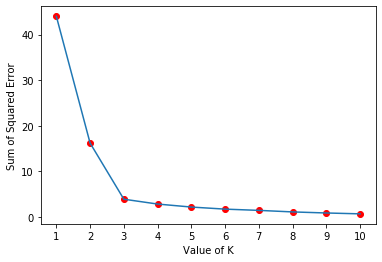

In [61]:
#Visualize SSE and k
plt.scatter(k_rng,SSE,color="red")
plt.plot(k_rng,SSE) 
#means Independent variable =k_rng and dependent variable Y=SSE
plt.xlabel("Value of K")
plt.ylabel("Sum of Squared Error")
plt.xticks(k_rng)
#plt.yticks(SSE)
plt.show()

In [ ]:
#right value of k=3